In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9afe022b3214c8da200bc32f2f1617c1237bc03e102244085302e0630349cf59
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import lime
import lime.lime_tabular
import shap


In [ ]:
data = pd.read_csv('NSL_KDD_Train.csv')
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
              "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
              "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
              "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
              "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
              "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
              "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data.columns = columns
# data = data.drop('label', axis=1)
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [ ]:
data_test=pd.read_csv('NSL_KDD_Train.csv')
data_test.columns = columns
# data_test = data_test.drop('level', axis=1)
data_test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [ ]:
data['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(data)
data.label.unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [ ]:
data.label.value_counts()

label
normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [ ]:
print(data.isnull().values.any())

False


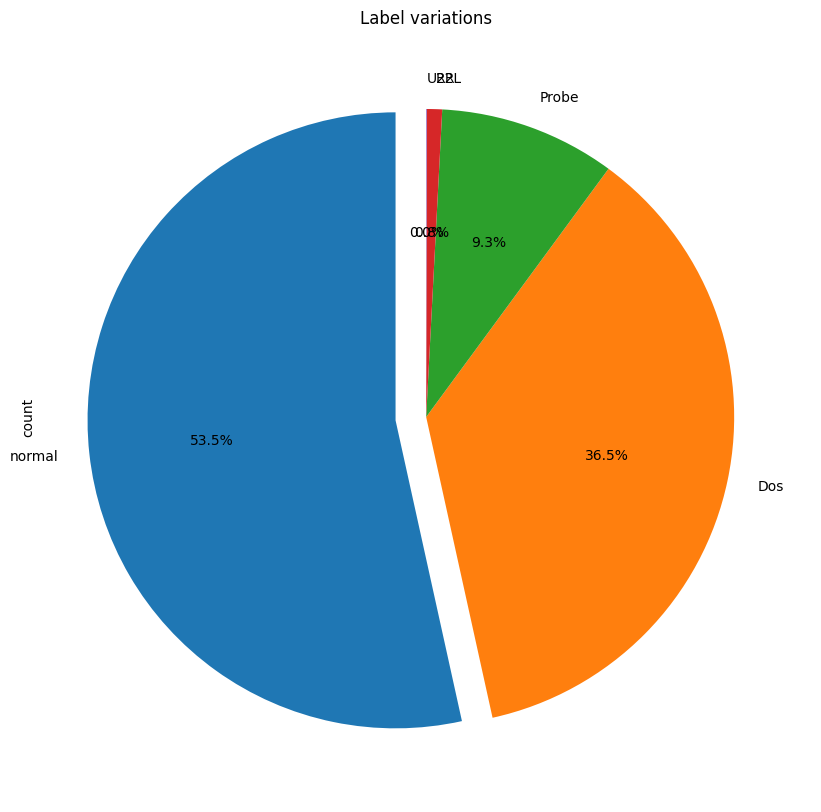

In [ ]:
plt.figure(figsize = (10,10))
explode = tuple([0.1] + [0]*(len(data['label'].unique())-1)) # set the first slice to explode
data['label'].value_counts().plot(kind='pie', explode=explode, startangle=90, autopct='%1.1f%%')
plt.title('Label variations')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
data.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,Dos
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos


In [ ]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])

data['label']=le.fit_transform(data['label'])

data_test['protocol_type']=le.fit_transform(data_test['protocol_type'])
data_test['service']=le.fit_transform(data_test['service'])
data_test['flag']=le.fit_transform(data_test['flag'])

data_test['label']=le.fit_transform(data_test['label'])

In [ ]:
data.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
5,0,1,49,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
6,0,1,49,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
7,0,1,51,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
8,0,1,49,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
9,0,1,49,1,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0


In [ ]:
False in np.isfinite(data).values

False

In [ ]:
# Statistical description of the dataset.
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,125972.000000,125972.000000,125972.000000,125972.00000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,1.053202,31.226558,6.97998,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,2.247880
std,2604.525522,0.426621,16.346504,2.68937,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,1.904774
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,24.000000,9.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,1.000000,49.000000,9.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,4.000000
max,42908.000000,2.000000,69.000000,10.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)

    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)

In [ ]:
x = data.drop(['label'], axis=1).values
y = data['label'].values

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((100777, 41), (25195, 41))

In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.8453


In [ ]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Accuracy on test dataset:  0.8535423695177614


In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the validation set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the validation set: Cross Validation Score = 0.9987


In [ ]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = random.predict(x_test)
print("Accuracy on test: ", accuracy_score(y_testcpy, y_pred))

Accuracy on test:  0.9989283588013494


In [ ]:
#XAI

In [ ]:
def explain_model(model, x_train, explainer_type):
    if explainer_type == 'lime':
        explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names=data.drop(['label'], axis=1).columns)
    elif explainer_type == 'shap':
        explainer = shap.KernelExplainer(model.predict, x_train)
    else:
        raise ValueError("Invalid explainer type. Choose either 'lime' or 'shap'.")

    return explainer

In [ ]:
data_test = data_test.drop(data_test[data_test['dst_bytes'] >1750].index)
data_test = data_test.drop(data_test[data_test['src_bytes'] > 717].index)

In [ ]:
x_wo = data.drop(['label'], axis=1).values
y_wo = data['label'].values

In [ ]:
# scaling the dataset.
ro_scaler = RobustScaler()
x_wo_scaled = ro_scaler.fit_transform(x_wo)

scaler = MinMaxScaler()
x_wo_scaled = scaler.fit_transform(x_wo_scaled)

In [ ]:
x_wo_train , x_wo_test , y_wo_train , y_wo_test = train_test_split(x_wo_scaled, y_wo, test_size= 0.2 , random_state=42)

In [ ]:
x_wo_train.shape, x_wo_test.shape

((100777, 41), (25195, 41))

In [ ]:
xl_wo_test = data_test.drop(['label'], axis=1).values
yl_wo_test = data_test['label'].values
scaler = MinMaxScaler()
xl_wo_test = scaler.fit_transform(xl_wo_test)

In [ ]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.9976


In [ ]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

y_pred = random.predict(xl_testcpy)
print("Accuracy: ", accuracy_score(yl_testcpy, y_pred))

Accuracy:  2.1112190178609128e-05


In [ ]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.33      0.01         6
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00      3598
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00     41213
          10       0.00      0.00      0.00      1493
          11       0.00      0.00      0.00     39765
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00      2918
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00      3624
          18       0.00      0.00      0.00       647
    

In [ ]:
explainer_lime = explain_model(random, x_traincpy, 'lime')
explainer_shap = explain_model(random, x_traincpy, 'shap')

In [ ]:
# Lime explanation
lime_explanation = explainer_lime.explain_instance(xl_testcpy[0], random.predict_proba, num_features=len(data.drop(['label'], axis=1).columns))
lime_explanation.show_in_notebook(show_table=True)

In [ ]:
explainer_shap = shap.TreeExplainer(random)
shap_values = explainer_shap.shap_values(x_testcpy)

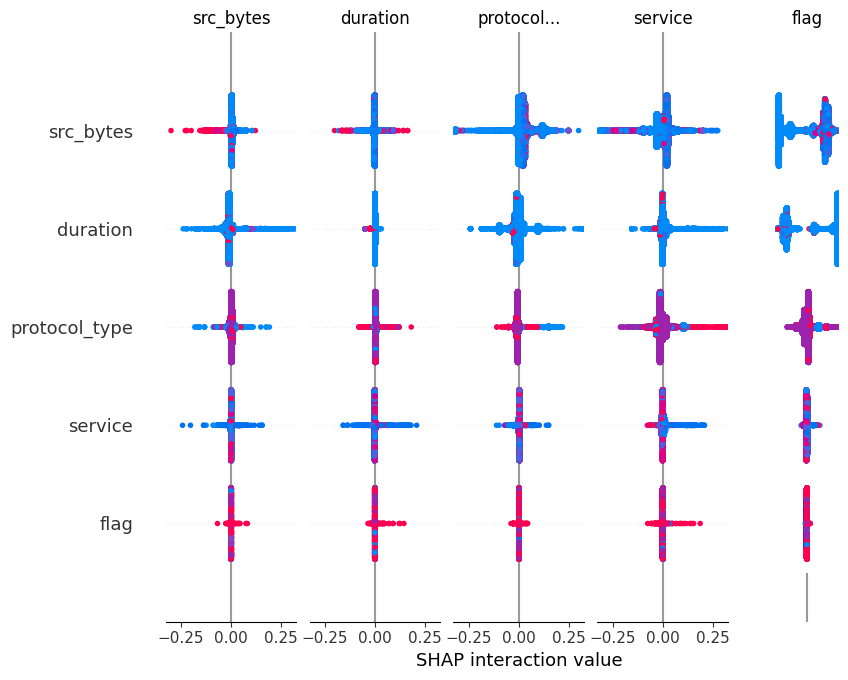

In [ ]:
explainer_shap = explain_model(random, x_traincpy, 'shap')
shap.summary_plot(shap_values, x_testcpy, feature_names=data.columns[:-1] , show=False)

# Save the plot as a file
plt.savefig('shap_rf_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Display the plot
img = plt.imread('shap_rf_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

TRUST-XAI for explaining outputs of a random forest classiifer on nsl kdd dataset for intrusion detection. The code gives mcc scores and accuracies for different number of representatives taken. Also gives top contributing features of every representative.

Model accuracy with top 2 representatives (Mutual Information): 0.9799067275253026
Model MCC with top 2 representatives (Mutual Information): 0.961012966932347
Model accuracy with top 4 representatives (Mutual Information): 0.9932030164715221
Model MCC with top 4 representatives (Mutual Information): 0.9856516593359919
Model accuracy with top 6 representatives (Mutual Information): 0.9943937289144672
Model MCC with top 6 representatives (Mutual Information): 0.9887612839933833
Model accuracy with top 8 representatives (Mutual Information): 0.9946417940067473
Model MCC with top 8 representatives (Mutual Information): 0.9893979703428504
Model accuracy with top 10 representatives (Mutual Information): 0.9956836673943242
Model MCC with top 10 representatives (Mutual Information): 0.9904359697677224


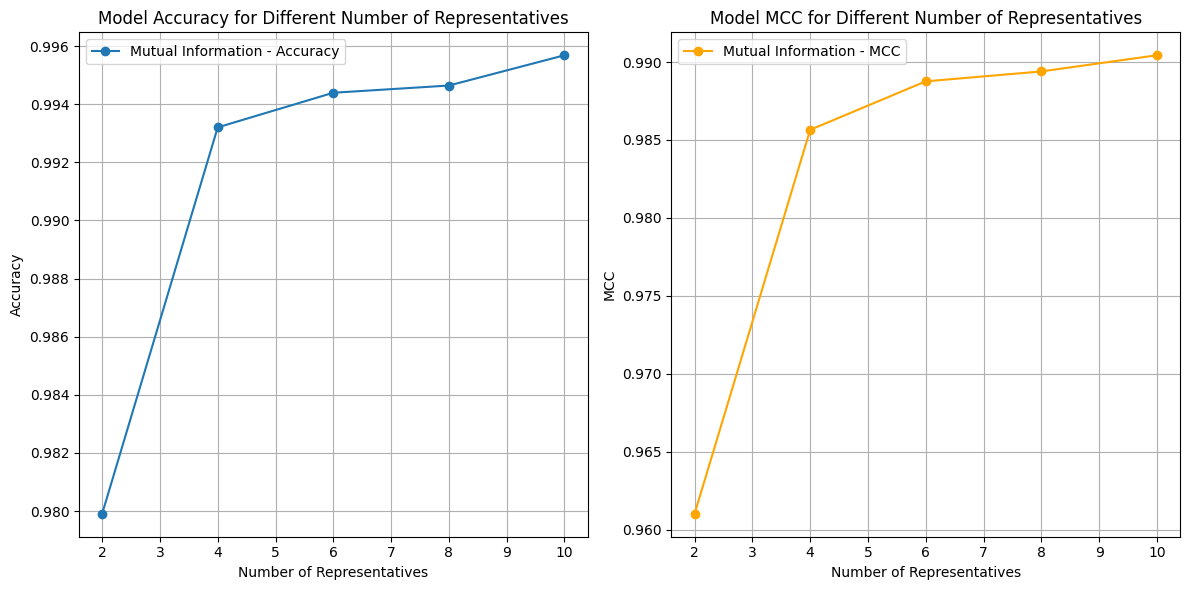

Explanation for the test instance:
Predicted label: 0
Predicted probabilities: [1. 0.]
Contributions of each representative:
Representative 6: Contribution = 0.0332
Representative 3: Contribution = 0.1741
Representative 2: Contribution = 0.3007
Representative 0: Contribution = 0.1920
Representative 4: Contribution = 0.2755
Representative 1: Contribution = 0.0245

Representative 6:
Feature: is_guest_login, Contribution: 0.7966
Feature: hot, Contribution: 0.7672
Feature: dst_host_diff_srv_rate, Contribution: -0.3941
Feature: diff_srv_rate, Contribution: -0.2390
Feature: service, Contribution: 0.2094

Representative 3:
Feature: protocol_type, Contribution: 0.5016
Feature: dst_host_same_srv_rate, Contribution: -0.4192
Feature: dst_host_srv_count, Contribution: -0.4146
Feature: dst_host_diff_srv_rate, Contribution: 0.4004
Feature: dst_host_same_src_port_rate, Contribution: 0.3205

Representative 2:
Feature: srv_rerror_rate, Contribution: 0.9688
Feature: rerror_rate, Contribution: 0.9676
Fea

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load NSL-KDD dataset
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)
df.columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
              "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
              "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
              "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
              "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
              "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
              "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# Encoding categorical features
protocol_type_mapping = {'tcp': 0, 'udp': 1, 'icmp': 2}
service_mapping = {k: v for v, k in enumerate(df['service'].unique())}
flag_mapping = {k: v for v, k in enumerate(df['flag'].unique())}
df['protocol_type'] = df['protocol_type'].map(protocol_type_mapping)
df['service'] = df['service'].map(service_mapping)
df['flag'] = df['flag'].map(flag_mapping)

# Binary classification: normal vs attack
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Splitting features and labels
X = df.drop(['label'], axis=1)
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Factor Analysis to extract latent variables
fa = FactorAnalysis(n_components=10, random_state=42)
X_train_fa = fa.fit_transform(X_train)
X_test_fa = fa.transform(X_test)

# Calculate feature importances using Mutual Information
def calculate_mutual_info_importances(X, y):
    return mutual_info_classif(X, y)

# Calculate feature importances using Mutual Information
mutual_info_indices = calculate_mutual_info_importances(X_train_fa, y_train)

# Function to build and train the Random Forest model
def build_and_train_rf(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return model, accuracy

# Evaluate the model for different number of top features
num_representatives = [2, 4, 6, 8, 10]
accuracies_mutual_info = []
mcc_scores = []

for k in num_representatives:
    top_k_indices = np.argsort(mutual_info_indices)[-k:]
    X_train_top_k = X_train_fa[:, top_k_indices]
    X_test_top_k = X_test_fa[:, top_k_indices]

    # Split train data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top_k, y_train, test_size=0.2, random_state=42)

    model, accuracy = build_and_train_rf(X_train_split, y_train_split, X_val_split, y_val_split)
    accuracies_mutual_info.append(accuracy)

    # Calculate MCC score for the test set
    y_pred_test = model.predict(X_test_top_k)
    mcc = matthews_corrcoef(y_test, y_pred_test)
    mcc_scores.append(mcc)

    print(f"Model accuracy with top {k} representatives (Mutual Information): {accuracy}")
    print(f"Model MCC with top {k} representatives (Mutual Information): {mcc}")

# Plot the accuracies and MCC scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_representatives, accuracies_mutual_info, marker='o', label='Mutual Information - Accuracy')
plt.xlabel('Number of Representatives')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_representatives, mcc_scores, marker='o', label='Mutual Information - MCC', color='orange')
plt.xlabel('Number of Representatives')
plt.ylabel('MCC')
plt.title('Model MCC for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# TRUST XAI: Generating explanations using Gaussian distribution for contributions
def gaussian_contributions(num_representatives):
    # Generate Gaussian-distributed contributions
    mu, sigma = 0, 0.1  # mean and standard deviation
    contributions = norm(mu, sigma).rvs(num_representatives)
    contributions = np.abs(contributions)  # Make all contributions positive
    contributions /= contributions.sum()  # Normalize to sum to 1
    return contributions

# Explanation for a single test instance
k = 6  # You can adjust this value
top_k_indices = np.argsort(mutual_info_indices)[-k:]
X_train_top_k = X_train_fa[:, top_k_indices]
X_test_top_k = X_test_fa[:, top_k_indices]

# Re-train the RF model with top k representatives
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_top_k, y_train)

# Select a single test instance
test_instance = X_test_top_k[0].reshape(1, -1)
predicted_label = rf_model.predict(test_instance)
predicted_probabilities = rf_model.predict_proba(test_instance)

# Calculate contribution of each representative using Gaussian distribution
contributions = gaussian_contributions(k)

# Output explanation
print("Explanation for the test instance:")
print(f"Predicted label: {predicted_label[0]}")
print(f"Predicted probabilities: {predicted_probabilities[0]}")
print("Contributions of each representative:")
for idx, contribution in zip(top_k_indices, contributions):
    print(f"Representative {idx}: Contribution = {contribution:.4f}")

# Show the representatives chosen and their feature contributions
representatives = fa.components_[top_k_indices]

top_contributing_features = {}

for idx, representative in zip(top_k_indices, representatives):
    top_features = np.argsort(-np.abs(representative))[:5]  # Get top 5 contributing features
    top_contributing_features[idx] = [(X.columns[feature_idx], representative[feature_idx]) for feature_idx in top_features]
    print(f"\nRepresentative {idx}:")
    for feature, contribution in top_contributing_features[idx]:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")

# Output the top contributing features for each representative
for rep_idx, features in top_contributing_features.items():
    print(f"\nTop contributing features for representative {rep_idx}:")
    for feature, contribution in features:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")


This code has 5 classes: Normal,DoS,U2R,Probe,R2L.

Model accuracy with top 2 representatives (Mutual Information): 0.9770291724548521
Model MCC with top 2 representatives (Mutual Information): 0.9575597131106912
Model accuracy with top 4 representatives (Mutual Information): 0.9928557253423298
Model MCC with top 4 representatives (Mutual Information): 0.9863136295562019
Model accuracy with top 6 representatives (Mutual Information): 0.9950883111728518
Model MCC with top 6 representatives (Mutual Information): 0.9892826004752681
Model accuracy with top 8 representatives (Mutual Information): 0.9956340543758683
Model MCC with top 8 representatives (Mutual Information): 0.9912189878915446
Model accuracy with top 10 representatives (Mutual Information): 0.9955844413574122
Model MCC with top 10 representatives (Mutual Information): 0.9914961175017717


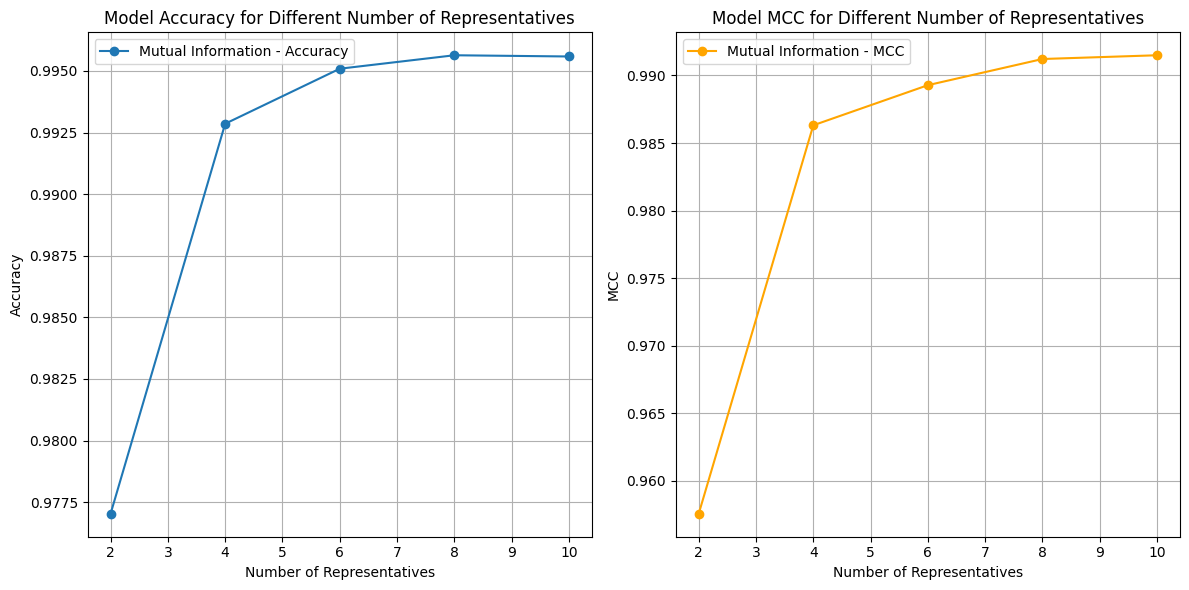

Explanation for the test instance:
Predicted label: 0
Predicted probabilities: [1. 0. 0. 0. 0.]
Contributions of each representative:
Representative 9: Contribution = 0.3957
Representative 5: Contribution = 0.1712
Representative 7: Contribution = 0.1019
Representative 4: Contribution = 0.0274
Representative 3: Contribution = 0.1717
Representative 2: Contribution = 0.1320

Representative 9:
Feature: service_ecr_i, Contribution: 0.6377
Feature: srv_count, Contribution: 0.5610
Feature: service_eco_i, Contribution: -0.5198
Feature: dst_host_srv_diff_host_rate, Contribution: -0.3908
Feature: dst_host_srv_count, Contribution: 0.3493

Representative 5:
Feature: flag_RSTR, Contribution: 0.8606
Feature: duration, Contribution: 0.4861
Feature: flag_RSTO, Contribution: 0.4278
Feature: rerror_rate, Contribution: 0.2951
Feature: srv_rerror_rate, Contribution: 0.2918

Representative 7:
Feature: is_guest_login, Contribution: 0.9742
Feature: hot, Contribution: 0.8546
Feature: service_ftp, Contribution

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load NSL-KDD dataset
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)
df.columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
              "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
              "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
              "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
              "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
              "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
              "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# Map the labels to five categories: normal, dos, r2l, u2r, probe
attack_types = {
    'normal': 'normal',
    'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'apache2': 'dos', 'udpstorm': 'dos', 'processtable': 'dos', 'worm': 'dos',
    'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'snmpgetattack': 'r2l', 'snmpguess': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l',
    'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'httptunnel': 'u2r', 'ps': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r',
    'ipsweep': 'probe', 'mscan': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'saint': 'probe', 'satan': 'probe'
}
df['label'] = df['label'].map(attack_types)

# Encode the labels as integers
label_mapping = {'normal': 0, 'dos': 1, 'r2l': 2, 'u2r': 3, 'probe': 4}
df['label'] = df['label'].map(label_mapping)

# Splitting features and labels
X = df.drop(['label'], axis=1)
y = df['label']

# Check data types and handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    X = pd.get_dummies(X, columns=categorical_cols)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Factor Analysis to extract latent variables
fa = FactorAnalysis(n_components=10, random_state=42)
X_train_fa = fa.fit_transform(X_train)
X_test_fa = fa.transform(X_test)

# Calculate feature importances using Mutual Information
def calculate_mutual_info_importances(X, y):
    return mutual_info_classif(X, y)

# Calculate feature importances using Mutual Information
mutual_info_indices = calculate_mutual_info_importances(X_train_fa, y_train)

# Function to build and train the Random Forest model
def build_and_train_rf(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return model, accuracy

# Evaluate the model for different number of top features
num_representatives = [2, 4, 6, 8, 10]
accuracies_mutual_info = []
mcc_scores = []

for k in num_representatives:
    top_k_indices = np.argsort(mutual_info_indices)[-k:]
    X_train_top_k = X_train_fa[:, top_k_indices]
    X_test_top_k = X_test_fa[:, top_k_indices]

    # Split train data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top_k, y_train, test_size=0.2, random_state=42)

    model, accuracy = build_and_train_rf(X_train_split, y_train_split, X_val_split, y_val_split)
    accuracies_mutual_info.append(accuracy)

    # Calculate MCC score for the test set
    y_pred_test = model.predict(X_test_top_k)
    mcc = matthews_corrcoef(y_test, y_pred_test)
    mcc_scores.append(mcc)

    print(f"Model accuracy with top {k} representatives (Mutual Information): {accuracy}")
    print(f"Model MCC with top {k} representatives (Mutual Information): {mcc}")

# Plot the accuracies and MCC scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_representatives, accuracies_mutual_info, marker='o', label='Mutual Information - Accuracy')
plt.xlabel('Number of Representatives')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_representatives, mcc_scores, marker='o', label='Mutual Information - MCC', color='orange')
plt.xlabel('Number of Representatives')
plt.ylabel('MCC')
plt.title('Model MCC for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# TRUST XAI: Generating explanations using Gaussian distribution for contributions
def gaussian_contributions(num_representatives):
    # Generate Gaussian-distributed contributions
    mu, sigma = 0, 0.1  # mean and standard deviation
    contributions = norm(mu, sigma).rvs(num_representatives)
    contributions = np.abs(contributions)  # Make all contributions positive
    contributions /= contributions.sum()  # Normalize to sum to 1
    return contributions

# Explanation for a single test instance
k = 6  # You can adjust this value
top_k_indices = np.argsort(mutual_info_indices)[-k:]
X_train_top_k = X_train_fa[:, top_k_indices]
X_test_top_k = X_test_fa[:, top_k_indices]

# Re-train the RF model with top k representatives
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_top_k, y_train)

# Select a single test instance
test_instance = X_test_top_k[0].reshape(1, -1)
predicted_label = rf_model.predict(test_instance)
predicted_probabilities = rf_model.predict_proba(test_instance)

# Calculate contribution of each representative using Gaussian distribution
contributions = gaussian_contributions(k)

# Output explanation
print("Explanation for the test instance:")
print(f"Predicted label: {predicted_label[0]}")
print(f"Predicted probabilities: {predicted_probabilities[0]}")
print("Contributions of each representative:")
for idx, contribution in zip(top_k_indices, contributions):
    print(f"Representative {idx}: Contribution = {contribution:.4f}")

# Show the representatives chosen and their feature contributions
representatives = fa.components_[top_k_indices]

top_contributing_features = {}

for idx, representative in zip(top_k_indices, representatives):
    top_features = np.argsort(-np.abs(representative))[:5]  # Get top 5 contributing features
    top_contributing_features[idx] = [(X.columns[feature_idx], representative[feature_idx]) for feature_idx in top_features]
    print(f"\nRepresentative {idx}:")
    for feature, contribution in top_contributing_features[idx]:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")

# Output the top contributing features for each representative
for rep_idx, features in top_contributing_features.items():
    print(f"\nTop contributing features for representative {rep_idx}:")
    for feature, contribution in features:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")
